In [46]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

from keras.layers import Input, Dense, BatchNormalization, Add, GaussianNoise, Dropout
from keras.models import Model
from keras import regularizers
from keras import optimizers
import re
import tensorflow as tf #tensorflow
from tensorflow import keras #keras
from tensorflow.keras import layers #layers
from keras import backend as K #keras backend

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from google.colab import drive #library to read google drive files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
train_df ='/content/gdrive/My Drive/titanic_practica/train.csv' #training data direction
test_df ='/content/gdrive/My Drive/titanic_practica/test.csv' #validation data direction
datos_train = pd.read_csv(train_df) #read training data with pandas
datos_test = pd.read_csv(test_df) #read test data with pandas
datos_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
# Remove NaN from Cabin and One-Hot of Cabin (Train)
datos_train['hasCabinNaN'] = np.zeros
datos_train['hasCabinA'] = np.zeros
datos_train['hasCabinB'] = np.zeros
datos_train['hasCabinC'] = np.zeros
for i in range(datos_train['PassengerId'].size):
      separacion = str(datos_train['Cabin'][i])
      separacion.split()
      if 'A' not in separacion and 'B' not in separacion and 'C' not in separacion:
         datos_train['hasCabinNaN'][i] = 1
         datos_train['hasCabinA'][i] = 0
         datos_train['hasCabinB'][i] = 0
         datos_train['hasCabinC'][i] = 0
      elif 'A' in separacion and 'B' not in separacion and 'C' not in separacion:
         datos_train['hasCabinNaN'][i] = 0
         datos_train['hasCabinA'][i] = 1
         datos_train['hasCabinB'][i] = 0
         datos_train['hasCabinC'][i] = 0
      elif 'A' not in separacion and 'B' in separacion and 'C' not in separacion:
         datos_train['hasCabinNaN'][i] = 0
         datos_train['hasCabinA'][i] = 0
         datos_train['hasCabinB'][i] = 1
         datos_train['hasCabinC'][i] = 0
      elif 'A' not in separacion and 'B' not in separacion and 'C' in separacion:  
         datos_train['hasCabinNaN'][i] = 0
         datos_train['hasCabinA'][i] = 0
         datos_train['hasCabinB'][i] = 0
         datos_train['hasCabinC'][i] = 1


datos_train = datos_train.drop('Cabin', axis = 1)
datos_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,hasCabinNaN,hasCabinA,hasCabinB,hasCabinC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0,0,1


In [49]:
# Remove NaN from Cabin and One-Hot of Cabin (Train)
datos_test['hasCabinNaN'] = np.zeros
datos_test['hasCabinA'] = np.zeros
datos_test['hasCabinB'] = np.zeros
datos_test['hasCabinC'] = np.zeros
for i in range(datos_test['PassengerId'].size):
      separacion = str(datos_test['Cabin'][i])
      separacion.split()
      if 'A' not in separacion and 'B' not in separacion and 'C' not in separacion:
         datos_test['hasCabinNaN'][i] = 1
         datos_test['hasCabinA'][i] = 0
         datos_test['hasCabinB'][i] = 0
         datos_test['hasCabinC'][i] = 0
      elif 'A' in separacion and 'B' not in separacion and 'C' not in separacion:
         datos_test['hasCabinNaN'][i] = 0
         datos_test['hasCabinA'][i] = 1
         datos_test['hasCabinB'][i] = 0
         datos_test['hasCabinC'][i] = 0
      elif 'A' not in separacion and 'B' in separacion and 'C' not in separacion:
         datos_test['hasCabinNaN'][i] = 0
         datos_test['hasCabinA'][i] = 0
         datos_test['hasCabinB'][i] = 1
         datos_test['hasCabinC'][i] = 0
      elif 'A' not in separacion and 'B' not in separacion and 'C' in separacion:  
         datos_test['hasCabinNaN'][i] = 0
         datos_test['hasCabinA'][i] = 0
         datos_test['hasCabinB'][i] = 0
         datos_test['hasCabinC'][i] = 1


datos_test = datos_test.drop('Cabin', axis = 1)
datos_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,hasCabinNaN,hasCabinA,hasCabinB,hasCabinC
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,1,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,1,0,0,0


In [50]:
# One-Hot of Sex (Train)

datos_train['Male'] = np.zeros
datos_train['Female'] = np.zeros

for i in range(datos_train['PassengerId'].size):

      if datos_train['Sex'][i] == 'male':
         datos_train['Male'][i] = 1
         datos_train['Female'][i] = 0

      elif datos_train['Sex'][i] == 'female':
         datos_train['Male'][i] = 0
         datos_train['Female'][i] = 1

datos_train = datos_train.drop('Sex', axis = 1)
datos_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/l

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,hasCabinNaN,hasCabinA,hasCabinB,hasCabinC,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,0,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0,0,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,1,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,0,0,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,S,1,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,0,0,0,1,1,0


In [51]:
# One-Hot of Sex (Train)

datos_test['Male'] = np.zeros
datos_test['Female'] = np.zeros

for i in range(datos_test['PassengerId'].size):

      if datos_test['Sex'][i] == 'male':
         datos_test['Male'][i] = 1
         datos_test['Female'][i] = 0

      elif datos_test['Sex'][i] == 'female':
         datos_test['Male'][i] = 0
         datos_test['Female'][i] = 1

datos_test = datos_test.drop('Sex', axis = 1)
datos_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/l

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,hasCabinNaN,hasCabinA,hasCabinB,hasCabinC,Male,Female
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,1,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,1,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,1,0,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,S,1,0,0,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C,0,0,0,1,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,0,0,1,0
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,S,1,0,0,0,1,0


In [52]:
# One-Hot of Embarked (Train)

datos_train['embarkedS'] = np.zeros
datos_train['embarkedC'] = np.zeros
datos_train['embarkedQ'] = np.zeros

for i in range(datos_train['PassengerId'].size):

      if datos_train['Embarked'][i] == 'S': 
        datos_train['embarkedS'][i] = 1
        datos_train['embarkedC'][i] = 0
        datos_train['embarkedQ'][i] = 0

      elif datos_train['Embarked'][i] == 'C':
        datos_train['embarkedS'][i] = 0
        datos_train['embarkedC'][i] = 1
        datos_train['embarkedQ'][i] = 0

      else:
        datos_train['embarkedS'][i] = 0
        datos_train['embarkedC'][i] = 0
        datos_train['embarkedQ'][i] = 1


datos_train = datos_train.drop('Embarked', axis = 1)
datos_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,hasCabinNaN,hasCabinA,hasCabinB,hasCabinC,Male,Female,embarkedS,embarkedC,embarkedQ
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,1,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,0,0,1,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1,0,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,1,0,0,0,0,1,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,0,0,1,1,0,0,1,0


In [53]:
# One-Hot of Embarked (Test)

datos_test['embarkedS'] = np.zeros
datos_test['embarkedC'] = np.zeros
datos_test['embarkedQ'] = np.zeros

for i in range(datos_test['PassengerId'].size):

      if datos_test['Embarked'][i] == 'S': 
        datos_test['embarkedS'][i] = 1
        datos_test['embarkedC'][i] = 0
        datos_test['embarkedQ'][i] = 0

      elif datos_test['Embarked'][i] == 'C':
        datos_test['embarkedS'][i] = 0
        datos_test['embarkedC'][i] = 1
        datos_test['embarkedQ'][i] = 0

      else:
        datos_test['embarkedS'][i] = 0
        datos_test['embarkedC'][i] = 0
        datos_test['embarkedQ'][i] = 1


datos_test = datos_test.drop('Embarked', axis = 1)
datos_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to b

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,hasCabinNaN,hasCabinA,hasCabinB,hasCabinC,Male,Female,embarkedS,embarkedC,embarkedQ
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,0,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,0,1,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,0,0,1,0,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,0,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,1,0,0,0,1,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,0,0,0,1,0,1,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,1,0,0,0,1,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,1,0,0,0,1,0,1,0,0


In [54]:
# Age Preprocessing

for i in range(datos_train['PassengerId'].size):

      if pd.isna(datos_train['Age'][i]): 
          datos_train = datos_train.drop(i, axis = 0)
          

datos_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,hasCabinNaN,hasCabinA,hasCabinB,hasCabinC,Male,Female,embarkedS,embarkedC,embarkedQ
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,1,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,1,0,0,0,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,0,0,1,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1,0,0,1,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,0,0,1,1,0,0,1,0


In [55]:
# Drop Name, Ticket and Passenger Id

datos_train = datos_train.drop('Name', axis = 1)
datos_train = datos_train.drop('PassengerId', axis = 1)
datos_train = datos_train.drop('Ticket', axis = 1)
datos_test = datos_test.drop('Name', axis = 1)
datos_test = datos_test.drop('PassengerId', axis = 1)
datos_test = datos_test.drop('Ticket', axis = 1)

In [56]:
# Separating Survived as "y" and rest of the table as "x"

datos_train_y = datos_train['Survived']
datos_train_x = datos_train.drop('Survived', axis = 1)

In [57]:
# Transforming dataframes in arrays

datos_train_x = np.asarray(datos_train_x).astype('float32')
datos_train_y = np.asarray(datos_train_y).astype('float32')
datos_test = np.asarray(datos_test).astype('float32')

Separating data in training and validation

In [58]:
train_dfX,val_dfX,train_dfY, val_dfY = train_test_split(datos_train_x,datos_train_y, test_size=0.1)

F1 Score

In [59]:
def get_f1(y_true, y_pred): #function defining F1 score parameters
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Model

In [60]:
p1 = layers.Input(shape=(14,))

a1 = layers.Dense(32, activation="sigmoid")(p1)
a2 = layers.Dense(16, activation="sigmoid")(a1)
final = layers.Dense(1, activation="sigmoid")(a2)

modelo = keras.Model(inputs=p1, outputs=final)
modelo.summary()
modelo.compile("adam", "binary_crossentropy", metrics=["accuracy",get_f1])
h = modelo.fit(train_dfX, train_dfY, epochs=200, validation_data=(val_dfX, val_dfY))  

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
21/21 [==============================] - 1s 13ms/step - loss: 0.7711 - accuracy: 0.4065 - get_f1: 0.5481 - val_loss: 0.7230 - val_accuracy: 0.4028 - val_get_f1: 0.5966
Epoch 2/200
21/21 [==============================] - 0s 3ms/step - loss: 0.

In [61]:
# Graph of the model

precisiones_globales=[]
def graf_model(train_history):
    f = plt.figure(figsize=(15,10))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    # summarize history for accuracy
    ax.plot(train_history.history['accuracy'])
    ax.plot(train_history.history['val_accuracy'])
    ax.set_title('model accuracy')
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(train_history.history['loss'])
    ax2.plot(train_history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    plt.show()
def precision(model, registrar=False):
    y_pred = model.predict(train_dfX)
    train_auc = roc_auc_score(train_dfY, y_pred)
    y_pred = model.predict(val_dfX)
    val_auc = roc_auc_score(val_dfY, y_pred)
    print('Train AUC: ', train_auc)
    print('Vali AUC: ', val_auc)
    if registrar:
        precisiones_globales.append([train_auc,val_auc])

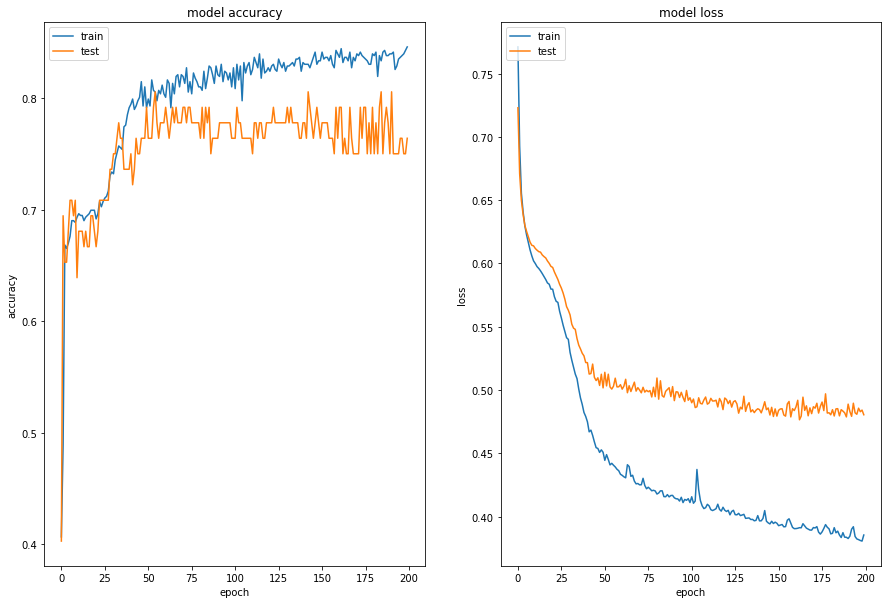

Train AUC:  0.8902816745607949
Vali AUC:  0.7959101844426624


In [62]:
# Show graph

graf_model(h)
precision(modelo, True)

In [63]:
predicciones = modelo.predict(datos_test) #make predictions

In [64]:
predicciones = np.where(predicciones > 0.5, 1, 0) # prediction > 0.5 is 1, else 0
#dataframe with predictions
submission = pd.DataFrame(predicciones,columns=['Survived'])
#dataframe columns:
submission['PassengerId'] = np.arange(len(predicciones))+892
submission = submission[['PassengerId','Survived']]

In [65]:
submission #seeing the result of the predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
submission.to_csv(r'submission.csv',index = False) #saving results in CSV format

In [67]:
modelo.save('modelo90683.h5') #saving model as .h5